In [2]:
!pip install keras


In [1]:
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Generate a dataset with 10 random temperatures in Celsius
celsius_temperatures = np.random.uniform(low=-10, high=30, size=(10, 1))

# Convert Celsius to Fahrenheit
fahrenheit_labels = (celsius_temperatures * 9/5) + 32

# Display the dataset
dataset = np.concatenate((celsius_temperatures, fahrenheit_labels), axis=1)
print("Celsius\t\tFahrenheit")
print("------------------------")
for celsius, fahrenheit in dataset:
    print(f"{celsius:.2f}°C\t\t{fahrenheit:.2f}°F")


Celsius		Fahrenheit
------------------------
4.98°C		40.97°F
28.03°C		82.45°F
19.28°C		66.70°F
13.95°C		57.10°F
-3.76°C		25.23°F
-3.76°C		25.23°F
-7.68°C		18.18°F
24.65°C		76.36°F
14.04°C		57.28°F
18.32°C		64.98°F


In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Set a seed for reproducibility
np.random.seed(42)

# Generate a dataset with 10 random temperatures in Celsius
celsius_temperatures = np.random.uniform(low=-10, high=30, size=(10, 1))

# Convert Celsius to Fahrenheit
fahrenheit_labels = (celsius_temperatures * 9/5) + 32

# Build a simple neural network with one neuron
model = Sequential()
model.add(Dense(units=1, input_dim=1, use_bias=True))  # One neuron with bias
model.compile(optimizer='adam', loss='mean_squared_error')  # Adam optimizer, mean squared error loss

# Display the model architecture
model.summary()

# Custom training loop
epochs = 800
batch_size = 2

for epoch in range(epochs):
    for i in range(len(celsius_temperatures)):
        x_batch = celsius_temperatures[i:i+batch_size]
        y_batch = fahrenheit_labels[i:i+batch_size]
        model.train_on_batch(x_batch, y_batch)

# Make predictions
predictions = model.predict(celsius_temperatures)

# Calculate mean squared error
mse = np.mean(np.square(predictions - fahrenheit_labels))
print(f"Mean Squared Error: {mse}")


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 36ms/step
Mean Squared Error: 364.7071266549521


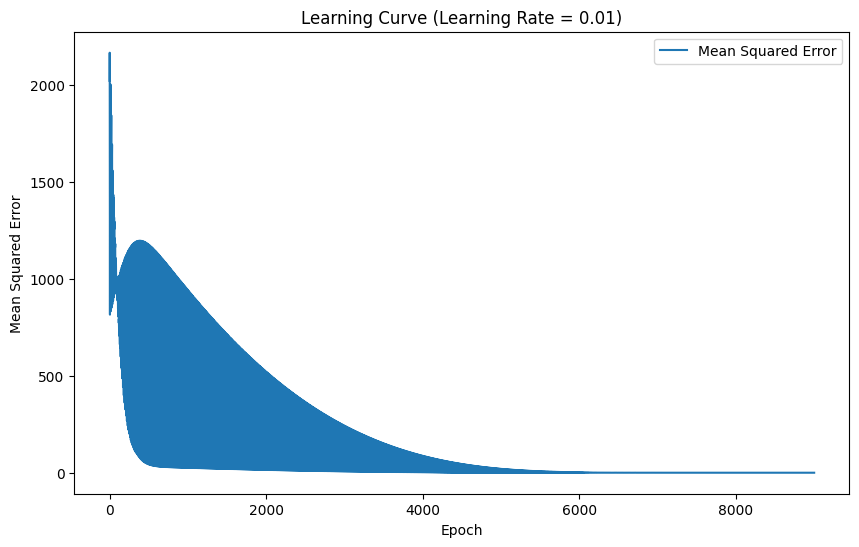

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adam

# Set a seed for reproducibility
np.random.seed(42)

# Generate a dataset with 10 random temperatures in Celsius
celsius_temperatures = np.random.uniform(low=-10, high=30, size=(10, 1))

# Convert Celsius to Fahrenheit
fahrenheit_labels = (celsius_temperatures * 9/5) + 32

# Build a simple neural network with one neuron
model = Sequential()
model.add(Dense(units=1, input_dim=1, use_bias=True))  # One neuron with bias
optimizer = Adam(learning_rate=0.01)  # Specify the learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error')  # Adam optimizer, mean squared error loss

# Lists to store training history
history_mse = []

# Custom training loop
epochs = 900
batch_size = 3

for epoch in range(epochs):
    for i in range(len(celsius_temperatures)):
        x_batch = celsius_temperatures[i:i+batch_size]
        y_batch = fahrenheit_labels[i:i+batch_size]
        mse = model.train_on_batch(x_batch, y_batch)
        history_mse.append(mse)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(history_mse) + 1), history_mse, label='Mean Squared Error')
plt.title('Learning Curve (Learning Rate = 0.01)')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


In [11]:
import numpy as np

# Generate new Celsius temperatures for prediction
new_celsius_temperatures = np.array([[15.0], [20.0], [25.0], [12.3], [36.2]])

# Convert Celsius to Fahrenheit for the new temperatures
actual_fahrenheit_values = (new_celsius_temperatures * 9/5) + 32

# Use the trained model to make predictions
predicted_fahrenheit_values = model.predict(new_celsius_temperatures)

# Display the results
print("Celsius\t\tActual Fahrenheit\tPredicted Fahrenheit")
print("-------------------------------------------------")
for celsius, actual, predicted in zip(new_celsius_temperatures, actual_fahrenheit_values, predicted_fahrenheit_values):
    print(f"{celsius[0]:.2f}°C\t\t{actual[0]:.2f}°F\t\t{predicted[0]:.2f}°F")


1/1 [==============================] - 0s 37ms/step
Celsius		Actual Fahrenheit	Predicted Fahrenheit
-------------------------------------------------
15.00°C		59.00°F		59.00°F
20.00°C		68.00°F		68.00°F
25.00°C		77.00°F		77.00°F
12.30°C		54.14°F		54.14°F
36.20°C		97.16°F		97.16°F


In [12]:
# Get the weights and bias of the model
weights, bias = model.layers[0].get_weights()

# Display the weights and bias
print(f"Weight (w1): {weights[0][0]:.2f}")
print(f"Bias (w0): {bias[0]:.2f}")


Weight (w1): 1.80
Bias (w0): 32.00
